In [ ]:
! pip install -Uqq kaggle fastbook

In [ ]:
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"umangkaushik","key":"234b5b0e4848168df053adcfc29ac204"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 98% 735M/750M [00:21<00:00, 45.1MB/s]
100% 750M/750M [00:21<00:00, 36.1MB/s]


In [ ]:
! mkdir dog-dataset
! unzip stanford-dogs-dataset.zip -d dog-dataset

In [ ]:
path = Path('dog-dataset')
path.ls()

(#2) [Path('dog-dataset/images'),Path('dog-dataset/annotations')]

In [ ]:
path_img = path/'images/Images'
path_img.ls()

(#120) [Path('dog-dataset/images/Images/n02102040-English_springer'),Path('dog-dataset/images/Images/n02107683-Bernese_mountain_dog'),Path('dog-dataset/images/Images/n02088632-bluetick'),Path('dog-dataset/images/Images/n02110063-malamute'),Path('dog-dataset/images/Images/n02092002-Scottish_deerhound'),Path('dog-dataset/images/Images/n02106550-Rottweiler'),Path('dog-dataset/images/Images/n02094433-Yorkshire_terrier'),Path('dog-dataset/images/Images/n02110958-pug'),Path('dog-dataset/images/Images/n02112137-chow'),Path('dog-dataset/images/Images/n02107908-Appenzeller')...]

In [ ]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=RandomResizedCrop(224, min_scale=0.5),
                 batch_tfms=aug_transforms())

In [ ]:
dls = data.dataloaders(path)

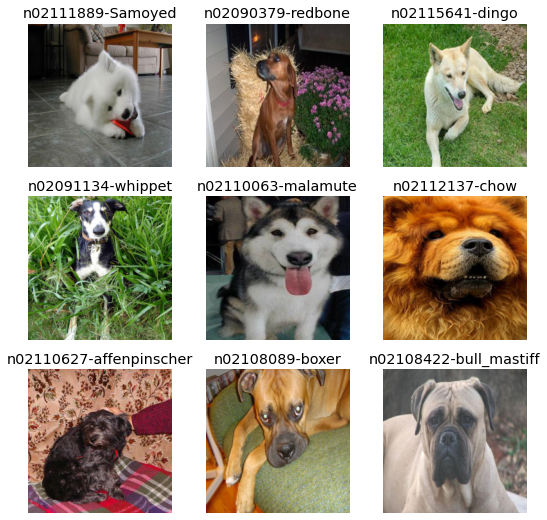

In [ ]:
dls.valid.show_batch(max_n=9, nrows=3)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.914657,0.740612,0.222546,02:17
1,1.007184,0.584171,0.187075,02:16
2,0.807767,0.536676,0.162293,02:16
3,0.704675,0.511188,0.157920,02:16


In [ ]:
learn.unfreeze()

SuggestedLRs(valley=8.31763736641733e-06)

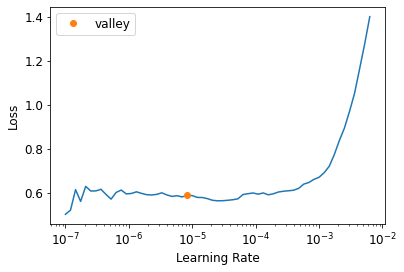

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(3e-6, 3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.592495,0.505183,0.159621,03:12
1,0.590438,0.499478,0.157920,03:09
2,0.577733,0.501173,0.156948,03:09
3,0.560284,0.497544,0.154519,03:10
4,0.553119,0.498319,0.153790,03:09
5,0.536774,0.497162,0.156463,03:09
6,0.487125,0.490319,0.153547,03:08
7,0.473075,0.493558,0.154762,03:10
8,0.463766,0.486043,0.150632,03:09
9,0.456575,0.491813,0.152818,03:09


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

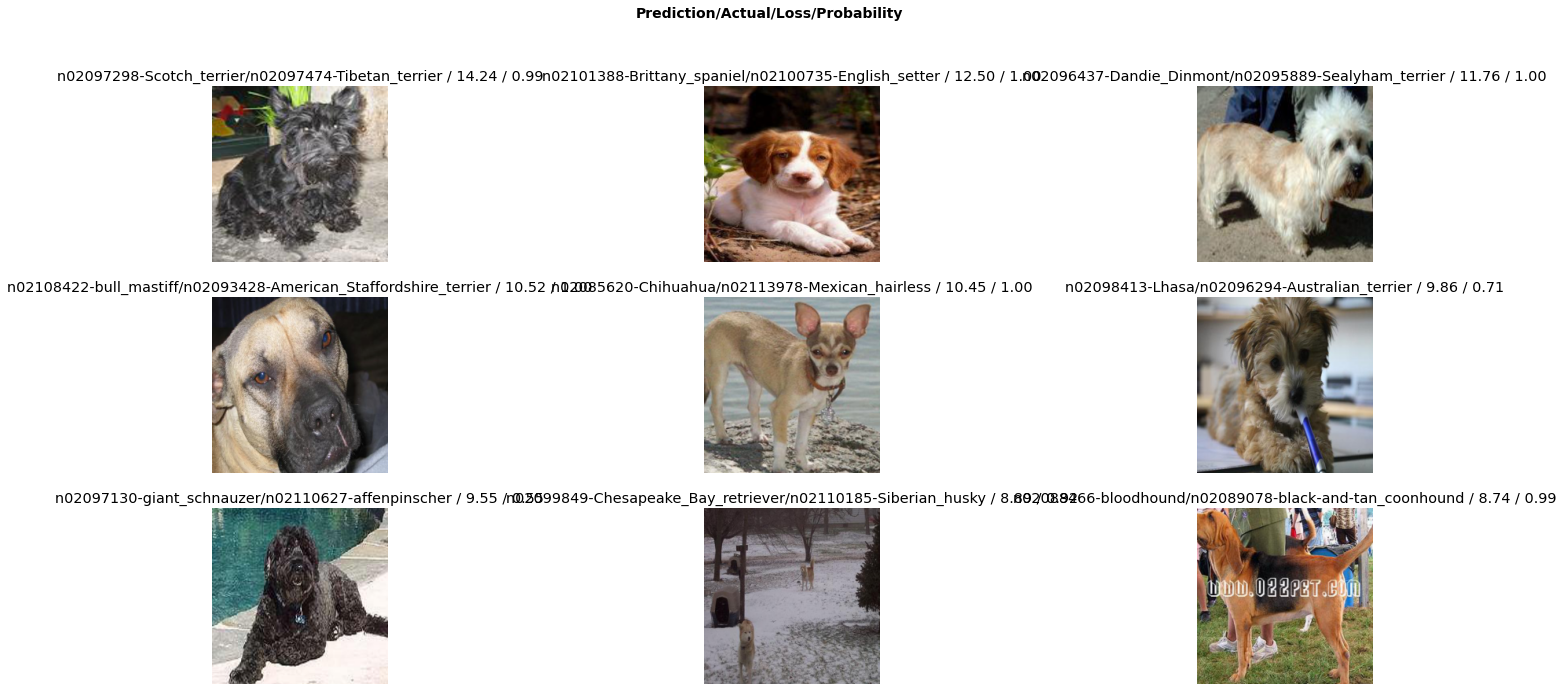

In [ ]:
interp.plot_top_losses(9, figsize=(25, 11))

In [ ]:
interp.most_confused(min_val=5)

[('n02113712-miniature_poodle', 'n02113624-toy_poodle', 10),
 ('n02109961-Eskimo_dog', 'n02110063-malamute', 9),
 ('n02109961-Eskimo_dog', 'n02110185-Siberian_husky', 9),
 ('n02089973-English_foxhound', 'n02089867-Walker_hound', 8),
 ('n02090379-redbone', 'n02087394-Rhodesian_ridgeback', 8),
 ('n02106030-collie', 'n02106166-Border_collie', 8),
 ('n02108000-EntleBucher', 'n02107574-Greater_Swiss_Mountain_dog', 8),
 ('n02093428-American_Staffordshire_terrier',
  'n02093256-Staffordshire_bullterrier',
  6),
 ('n02098413-Lhasa', 'n02086240-Shih-Tzu', 6),
 ('n02106166-Border_collie', 'n02106030-collie', 6),
 ('n02106662-German_shepherd', 'n02105162-malinois', 6),
 ('n02110185-Siberian_husky', 'n02110063-malamute', 6),
 ('n02087046-toy_terrier', 'n02107312-miniature_pinscher', 5),
 ('n02091134-whippet', 'n02091032-Italian_greyhound', 5),
 ('n02092002-Scottish_deerhound', 'n02090721-Irish_wolfhound', 5),
 ('n02093256-Staffordshire_bullterrier',
  'n02093428-American_Staffordshire_terrier',
  

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
from fastai.vision.widgets import *

learn_inf = load_learner(path/'export.pkl')
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {str(pred)[10:]}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your Image'),
      btn_upload, btn_run, out_pl, lbl_pred])